In [3]:
import torch

checkpoint_path = '/home/s2644572/cv_miniProject2submit/params/clip_segmentation_RN50x16_300_epoch_combined_diceScore_focal_loss_with_es_with_hard_augmentation_1.pth'

checkpoint = torch.load(checkpoint_path, map_location="cpu")  # Load checkpoint to CPU

# Print the keys in the checkpoint
print("Checkpoint Keys:", checkpoint.keys())

# If state_dict exists, check its keys
if "state_dict" in checkpoint:
    print("Model State Dict Keys:", checkpoint["state_dict"].keys())

# If optimizer state exists, check its keys
if "optimizer" in checkpoint:
    print("Optimizer State Dict Keys:", checkpoint["optimizer"].keys())

# Print metadata if available
if "meta" in checkpoint:
    print("Metadata:", checkpoint["meta"])

Checkpoint Keys: odict_keys(['clip_model.positional_embedding', 'clip_model.text_projection', 'clip_model.logit_scale', 'clip_model.visual.conv1.weight', 'clip_model.visual.bn1.weight', 'clip_model.visual.bn1.bias', 'clip_model.visual.bn1.running_mean', 'clip_model.visual.bn1.running_var', 'clip_model.visual.bn1.num_batches_tracked', 'clip_model.visual.conv2.weight', 'clip_model.visual.bn2.weight', 'clip_model.visual.bn2.bias', 'clip_model.visual.bn2.running_mean', 'clip_model.visual.bn2.running_var', 'clip_model.visual.bn2.num_batches_tracked', 'clip_model.visual.conv3.weight', 'clip_model.visual.bn3.weight', 'clip_model.visual.bn3.bias', 'clip_model.visual.bn3.running_mean', 'clip_model.visual.bn3.running_var', 'clip_model.visual.bn3.num_batches_tracked', 'clip_model.visual.layer1.0.conv1.weight', 'clip_model.visual.layer1.0.bn1.weight', 'clip_model.visual.layer1.0.bn1.bias', 'clip_model.visual.layer1.0.bn1.running_mean', 'clip_model.visual.layer1.0.bn1.running_var', 'clip_model.visu

In [2]:
import clip

models = {
    "RN50": clip.load("RN50", device="cpu"),
    "RN50x4": clip.load("RN50x4", device="cpu"),
    "RN50x16": clip.load("RN50x16", device="cpu"),
    "RN50x64": clip.load("RN50x64", device="cpu"),
    "ViT-B/32": clip.load("ViT-B/32", device="cpu"),
    "ViT-B/16": clip.load("ViT-B/16", device="cpu"),
    "ViT-L/14": clip.load("ViT-L/14", device="cpu"), 
}
for model_name, (model, preprocess) in models.items():
    # print the model name with corresponding number of parameters
    num_params = sum(p.numel() for p in model.parameters())
    print(f"{model_name}: {num_params:,} parameters")
    # print estimated memory usage
    mem_usage = num_params * 4 / (1024 ** 2)  # Assuming 4 bytes per float32
    print(f"Estimated memory usage: {mem_usage:.2f} MB")

RN50: 102,007,137 parameters
Estimated memory usage: 389.13 MB
RN50x4: 178,300,601 parameters
Estimated memory usage: 680.16 MB
RN50x16: 290,979,217 parameters
Estimated memory usage: 1110.00 MB
RN50x64: 623,258,305 parameters
Estimated memory usage: 2377.54 MB
ViT-B/32: 151,277,313 parameters
Estimated memory usage: 577.08 MB
ViT-B/16: 149,620,737 parameters
Estimated memory usage: 570.76 MB
ViT-L/14: 427,616,513 parameters
Estimated memory usage: 1631.23 MB


In [3]:
model, preprocess = clip.load("RN50", device="cpu")
print(model)


CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
     

Unique colors shape: (4016, 3)
Predicted image shape: (473, 600, 3)
Ground truth image shape: (473, 600, 3)


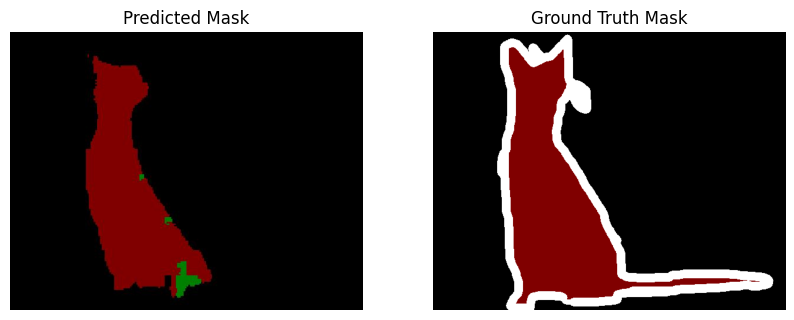

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load images
img = Image.open('/home/s2644572/cv_miniProject2submit/Dataset/Test/preds/Abyssinian_2.jpg')
img = np.array(img)

img_1 = Image.open('/home/s2644572/cv_miniProject2submit/Dataset/Test/label/Abyssinian_2.png').convert('RGB')
img_1 = np.array(img_1)  # Corrected to properly convert the second image

# Print shapes and unique colors
unique_colors = np.unique(img.reshape(-1, img.shape[2]), axis=0)
print(f"Unique colors shape: {unique_colors.shape}")
print(f"Predicted image shape: {img.shape}")
print(f"Ground truth image shape: {img_1.shape}")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # Corrected subplot usage

# Display images
ax[0].imshow(img)
ax[0].set_title("Predicted Mask")
ax[0].axis("off")

ax[1].imshow(img_1)
ax[1].set_title("Ground Truth Mask")
ax[1].axis("off")

plt.show()


In [5]:
import cv2 as cv
import numpy as np

img = cv.imread('/home/s2644572/cv_miniProject2submit/Dataset/Test/color/Abyssinian_3.jpg')
print(img.shape)
img_h,img_w = img.shape[:2]
print(img_h)
print(img_w)


(869, 600, 3)
869
600


In [2]:
import clip

# List all available pretrained CLIP models
print(clip.available_models())


['RN50', 'RN101', 'RN50x4', 'RN50x16', 'RN50x64', 'ViT-B/32', 'ViT-B/16', 'ViT-L/14', 'ViT-L/14@336px']


In [7]:
# Model name (choose from clip.available_models())
model_names = ['RN50', 'RN101', 'RN50x4', 'RN50x16', 'RN50x64', 'ViT-B/32', 'ViT-B/16', 'ViT-L/14']
    
for model_name in model_names:
    print(f"Model: {model_name}")
    model, _ = clip.load(model_name, device='cuda')

    # Count total parameters
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")

    # Assuming float32 (4 bytes per parameter)
    bytes_per_param = 4
    total_bytes = total_params * bytes_per_param
    size_mb = total_bytes / (1024 ** 2)

    print(f"Estimated checkpoint size for {model_name}: {size_mb:.2f} MB")

Model: RN50


/home/s2644572/miniconda3/envs/cv/lib/python3.10/site-packages/clip/clip.py:57: UserWarning: /home/s2644572/.cache/clip/RN50.pt exists, but the SHA256 checksum does not match; re-downloading the file
  warnings.warn(f"{download_target} exists, but the SHA256 checksum does not match; re-downloading the file")
100%|███████████████████████████████████████| 244M/244M [01:02<00:00, 4.09MiB/s]


Total parameters: 102,007,137
Trainable parameters: 102,007,137
Estimated checkpoint size for RN50: 389.13 MB
Model: RN101


100%|███████████████████████████████████████| 278M/278M [00:42<00:00, 6.83MiB/s]


Total parameters: 119,688,033
Trainable parameters: 119,688,033
Estimated checkpoint size for RN101: 456.57 MB
Model: RN50x4


100%|███████████████████████████████████████| 402M/402M [02:15<00:00, 3.11MiB/s]


Total parameters: 178,300,601
Trainable parameters: 178,300,601
Estimated checkpoint size for RN50x4: 680.16 MB
Model: RN50x16
Total parameters: 290,979,217
Trainable parameters: 290,979,217
Estimated checkpoint size for RN50x16: 1110.00 MB
Model: RN50x64


100%|█████████████████████████████████████| 1.26G/1.26G [07:19<00:00, 3.08MiB/s]


Total parameters: 623,258,305
Trainable parameters: 623,258,305
Estimated checkpoint size for RN50x64: 2377.54 MB
Model: ViT-B/32
Total parameters: 151,277,313
Trainable parameters: 151,277,313
Estimated checkpoint size for ViT-B/32: 577.08 MB
Model: ViT-B/16
Total parameters: 149,620,737
Trainable parameters: 149,620,737
Estimated checkpoint size for ViT-B/16: 570.76 MB
Model: ViT-L/14
Total parameters: 427,616,513
Trainable parameters: 427,616,513
Estimated checkpoint size for ViT-L/14: 1631.23 MB


In [9]:
device = "cpu"  # Faster and safer for param counting

model_sizes = []

model_names = ['RN50', 'RN101', 'RN50x4', 'RN50x16', 'RN50x64', 'ViT-B/32', 'ViT-B/16', 'ViT-L/14']
    
for model_name in model_names:
    try:
        model, _ = clip.load(model_name, device=device)
        total_params = sum(p.numel() for p in model.parameters())
        model_sizes.append((model_name, total_params))
    except Exception as e:
        print(f"Failed to load {model_name}: {e}")

# Sort by number of parameters (ascending)
model_sizes.sort(key=lambda x: x[1])
print()

# Print results
print("\nCLIP Models sorted by number of parameters:")
for name, params in model_sizes:
    size_mb = params * 4 / (1024 ** 2)  # assuming float32
    print(f"{name:20s} | {params:>10,} params | ~{size_mb:.2f} MB")



CLIP Models sorted by number of parameters:
RN50                 | 102,007,137 params | ~389.13 MB
RN101                | 119,688,033 params | ~456.57 MB
ViT-B/16             | 149,620,737 params | ~570.76 MB
ViT-B/32             | 151,277,313 params | ~577.08 MB
RN50x4               | 178,300,601 params | ~680.16 MB
RN50x16              | 290,979,217 params | ~1110.00 MB
ViT-L/14             | 427,616,513 params | ~1631.23 MB
RN50x64              | 623,258,305 params | ~2377.54 MB


In [13]:
import torch

def extract_clip_feature_map(image_tensor, clip_model):
    """
    Extracts feature maps from CLIP’s ResNet-based model (RNx16).
    The feature maps are taken before global average pooling.
    """
    with torch.no_grad():
        x = clip_model.visual.conv1(image_tensor)  # Initial conv layer
        x = clip_model.visual.bn1(x)
        x = clip_model.visual.relu1(x)
        x = clip_model.visual.conv2(x)
        x = clip_model.visual.bn2(x)
        x = clip_model.visual.relu2(x)
        x = clip_model.visual.conv3(x)
        x = clip_model.visual.bn3(x)
        x = clip_model.visual.relu3(x)
        x = clip_model.visual.avgpool(x)
        
        # ResNet blocks (extract features before avgpool)
        x = clip_model.visual.layer1(x)
        x = clip_model.visual.layer2(x)
        x = clip_model.visual.layer3(x)
        x = clip_model.visual.layer4(x)  # Final feature map

    return x  # ResNet feature map (B, C, H, W)

# Load CLIP RN50 model
clip_model, _ = clip.load("RN50", device="cpu")

# Create a dummy image tensor: batch_size=1, 3 channels, 224x224 resolution
dummy_input = torch.randn(1, 3, 224, 224)

# Run through your function
feature_map = extract_clip_feature_map(dummy_input, clip_model)

# Print the output shape
print("Feature map shape:", feature_map.shape)

Feature map shape: torch.Size([1, 2048, 7, 7])


In [12]:
print(clip_model)

CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
     

In [14]:
# List modules up to layer4
modules = [
    clip_model.visual.conv1,
    clip_model.visual.bn1,
    clip_model.visual.relu1,
    clip_model.visual.conv2,
    clip_model.visual.bn2,
    clip_model.visual.relu2,
    clip_model.visual.conv3,
    clip_model.visual.bn3,
    clip_model.visual.relu3,
    clip_model.visual.layer1,
    clip_model.visual.layer2,
    clip_model.visual.layer3,
    clip_model.visual.layer4,
]

# Count parameters
total_params = 0
for module in modules:
    total_params += sum(p.numel() for p in module.parameters())

print(f"Total parameters used in feature extraction (up to layer4): {total_params:,}")
print(f"Approximate size: {total_params * 4 / (1024 ** 2):.2f} MB")  # Assuming float32

Total parameters used in feature extraction (up to layer4): 23,527,264
Approximate size: 89.75 MB


In [3]:
# Load CLIP ViT-B/32
import clip
import torch.nn as nn
clip_model, _ = clip.load("ViT-B/16", device="cuda")

# Only count the vision transformer parameters
visual_encoder = clip_model.visual

# Count total and trainable parameters
total_params = sum(p.numel() for p in visual_encoder.parameters())
trainable_params = sum(p.numel() for p in visual_encoder.parameters() if p.requires_grad)

print(f"Total visual encoder params (ViT-B/32): {total_params:,}")
print(f"Model Size {total_params * 4 / (1024 ** 2):.2f} MB")  # Assuming float32

Total visual encoder params (ViT-B/32): 86,192,640
Model Size 328.80 MB


In [4]:
class CLIPFeatureExtractor(nn.Module):
    """
    Subset of CLIP visual model used in extract_clip_feature_map.
    Excludes avgpool and projection.
    """
    def __init__(self, clip_model):
        super().__init__()
        visual = clip_model.visual
        self.conv1 = visual.conv1
        self.bn1 = visual.bn1
        self.relu1 = visual.relu1
        self.conv2 = visual.conv2
        self.bn2 = visual.bn2
        self.relu2 = visual.relu2
        self.conv3 = visual.conv3
        self.bn3 = visual.bn3
        self.relu3 = visual.relu3

        self.layer1 = visual.layer1
        self.layer2 = visual.layer2
        self.layer3 = visual.layer3
        self.layer4 = visual.layer4

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x


In [ ]:
clip_model, _ = clip.load('RN50', device='cuda')
num_classes = 3

feature_extractor_module = CLIPFeatureExtractor(clip_model).cuda()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

feature_extractor_params = count_parameters(feature_extractor_module)

print(f"Feature Extractor Parameters (only used blocks): {feature_extractor_params:,}")
print(f"Approximate size: {feature_extractor_params * 4 / (1024 ** 2):.2f} MB")  # Assuming float32

'''
Segmentation Head Parameters: 7,115,651
Approximated size: 27.14 MB
'''


Feature Extractor Parameters (only used blocks): 23,527,264
Approximate size: 89.75 MB


In [14]:
print(f"{23527264 + 7115651:,}")
print(f"{109122788-7115651:,}")

30,642,915
102,007,137


In [10]:
def color2class(img: np.ndarray) -> np.ndarray:
    """
    Convert a label RGB image to pixel-wise class labels.

    Parameters:
        img (np.ndarray): Input image as a NumPy array (expected shape: (H, W, 3)).

    Returns:
        np.ndarray: Output array pixel-wise class labels (expected shape: (H, W)).
    """
    
    color_to_class = {
        (0, 0, 0): 0,         # Black -> Class 0
        (255, 255, 255): 0,   # White -> Class 0
        (128, 0, 0): 1,       # Dark Red -> Class 1
        (0, 128, 0): 2        # Green -> Class 2
    }
    h,w,_ = img.shape
    class_map = np.zeros((h,w), dtype=np.uint8)
    img_reshaped = img.reshape(-1,3)
    class_map_reshaped = np.zeros(img_reshaped.shape[0], dtype=np.uint8)

    # Assign class labels
    for color, class_id in color_to_class.items():
        mask = np.all(img_reshaped == color, axis=1)
        class_map_reshaped[mask] = class_id

    # Reshape back to original dimensions
    class_map = class_map_reshaped.reshape(h, w)

    return class_map

<class 'list'>
3305


processing images:   0%|          | 0/3305 [00:00<?, ?it/s]

processing images: 100%|██████████| 3305/3305 [00:31<00:00, 103.90it/s]


cat_img_number: 1055
dog_img_number: 2250


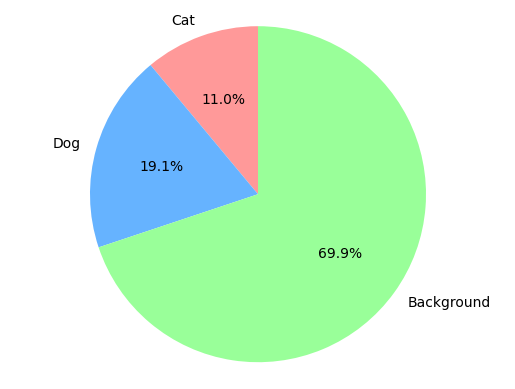

In [19]:
from pathlib import Path
from PIL import Image
import numpy as np
from tqdm import tqdm
raw_training_dir = '/home/s2644572/cv_miniProject2submit/Dataset/Train/label'
raw_training_paths = sorted(Path(raw_training_dir).glob('*.*'))
print(type(raw_training_paths))
print(len(raw_training_paths))
cat_img_number = 0
dog_img_number = 0
cat_pixel_number = 0
dog_pixel_number = 0
bg_pixel_number = 0
for path in tqdm(raw_training_paths, desc='processing images'):
    img = Image.open(path).convert('RGB')
    img_arr = np.array(img)
    class_arr = color2class(img_arr)
    cat_pixels = np.sum(class_arr == 1)
    dog_pixels = np.sum(class_arr == 2)
    bg_pixels = np.sum(class_arr == 0)
    cat_pixel_number += cat_pixels
    dog_pixel_number += dog_pixels
    bg_pixel_number += bg_pixels
    if cat_pixels > dog_pixels:
        cat_img_number += 1
    else:
        dog_img_number += 1

print(f'cat_img_number: {cat_img_number}')
print(f'dog_img_number: {dog_img_number}')
import matplotlib.pyplot as plt

# draw a pie chart over dog, cat, and background pixels
labels = ['Cat', 'Dog', 'Background']
sizes = [cat_pixel_number, dog_pixel_number, bg_pixel_number]
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')
plt.show()

<class 'list'>
17440


processing images: 100%|██████████| 17440/17440 [04:29<00:00, 64.69it/s] 

cat_img_number: 8440
dog_img_number: 9000


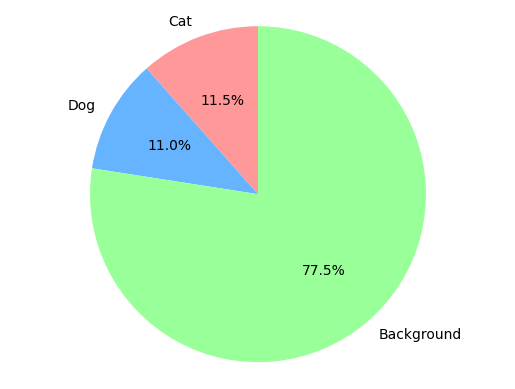

In [20]:
raw_training_dir = '/home/s2644572/cv_miniProject2submit/Dataset/TrainProcessed/label'
raw_training_paths = sorted(Path(raw_training_dir).glob('*.*'))
print(type(raw_training_paths))
print(len(raw_training_paths))
cat_img_number = 0
dog_img_number = 0
cat_pixel_number = 0
dog_pixel_number = 0
bg_pixel_number = 0
for path in tqdm(raw_training_paths, desc='processing images'):
    img = Image.open(path).convert('RGB')
    img_arr = np.array(img)
    class_arr = color2class(img_arr)
    cat_pixels = np.sum(class_arr == 1)
    dog_pixels = np.sum(class_arr == 2)
    bg_pixels = np.sum(class_arr == 0)
    cat_pixel_number += cat_pixels
    dog_pixel_number += dog_pixels
    bg_pixel_number += bg_pixels
    if cat_pixels > dog_pixels:
        cat_img_number += 1
    else:
        dog_img_number += 1

print(f'cat_img_number: {cat_img_number}')
print(f'dog_img_number: {dog_img_number}')
import matplotlib.pyplot as plt

# draw a pie chart over dog, cat, and background pixels
labels = ['Cat', 'Dog', 'Background']
sizes = [cat_pixel_number, dog_pixel_number, bg_pixel_number]
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')
plt.show()

Processing images: 100%|██████████| 3305/3305 [00:01<00:00, 2218.95it/s]


Number of images with width > 512: 44
percentage of images with width > 512: 1.33%
Number of images with height > 512: 27
percentage of images with height > 512: 0.82%


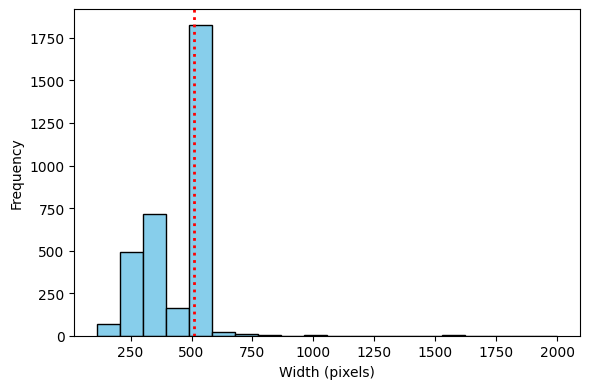

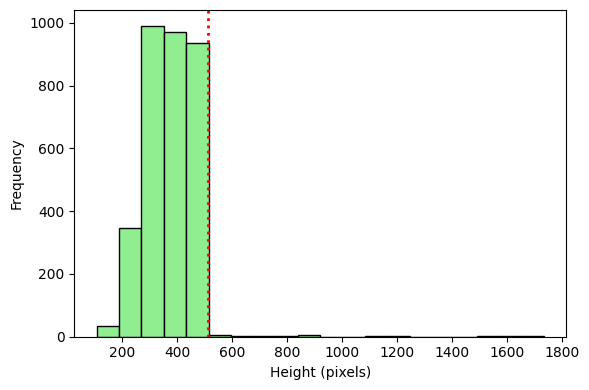

Number of oversize images: 47


In [1]:
import numpy as np
from PIL import Image
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

# Path to the raw training images
raw_training_dir = '/home/s2644572/cv_miniProject2submit/Dataset/Train/label'
raw_training_paths = sorted(Path(raw_training_dir).glob('*.*'))

# Lists to store widths and heights
widths, heights = [], []
oversize_img = 0

# Collect image dimensions
for path in tqdm(raw_training_paths, desc='Processing images'):
    img = Image.open(path).convert('RGB')
    w, h = img.size
    widths.append(w)
    heights.append(h)
    if w > 512 or h > 512:
        oversize_img += 1

# Convert to numpy arrays for easier manipulation
widths = np.array(widths)
heights = np.array(heights)

# Count how many are greater than 512
num_widths_above_512 = np.sum(widths > 512)
num_heights_above_512 = np.sum(heights > 512)

# Print counts
print(f'Number of images with width > 512: {num_widths_above_512}')
print(f'percentage of images with width > 512: {num_widths_above_512 / len(widths) * 100:.2f}%')
print(f'Number of images with height > 512: {num_heights_above_512}')
print(f'percentage of images with height > 512: {num_heights_above_512 / len(widths) * 100:.2f}%')

# Plot width histogram
plt.figure(figsize=(6, 4))
plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=512, color='red', linestyle='dotted', linewidth=2)
# plt.title('Histogram of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot height histogram
plt.figure(figsize=(6, 4))
plt.hist(heights, bins=20, color='lightgreen', edgecolor='black')
plt.axvline(x=512, color='red', linestyle='dotted', linewidth=2)
# plt.title('Histogram of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print(f'Number of oversize images: {oversize_img}')

In [2]:
import numpy as np
from PIL import Image
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

# Path to the raw training images
raw_training_dir = '/home/s2644572/cv_miniProject2submit/Dataset/Train/label'
raw_training_paths = sorted(Path(raw_training_dir).glob('*.*'))

# Lists to store widths and heights
widths, heights = [], []
smallest_img = 1e10
res = None
# Collect image dimensions
for path in tqdm(raw_training_paths, desc='Processing images'):
    img = Image.open(path).convert('RGB')
    w, h = img.size
    if smallest_img > w * h:
        smallest_img = w * h
        res = path
print(f'smallest image: {res}')
# print(f'Number of oversize images: {oversize_img}')

Processing images: 100%|██████████| 3305/3305 [00:01<00:00, 2213.90it/s]

smallest image: /home/s2644572/cv_miniProject2submit/Dataset/Train/label/Bombay_171.png


(108, 144, 3)


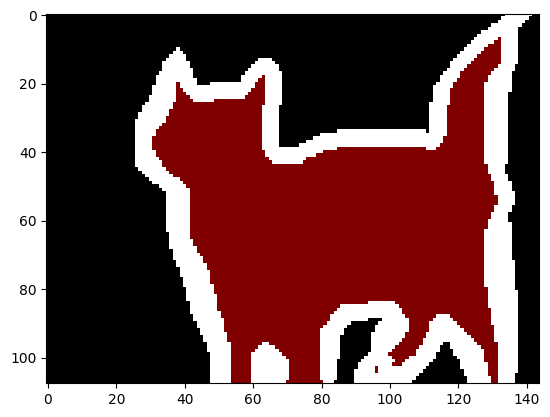

In [4]:
img= Image.open(res).convert('RGB')
print(np.array(img).shape)
plt.imshow(np.array(img))
plt.show()

In [10]:
import torch.nn as nn
class PointPromptEncoder(nn.Module):
    """
    Encode prompt points into a spatial representation using pre-generated heatmaps
    """
    def __init__(self, input_channels=1, output_dim=1024, num_classes=3):
        """
        Args:
            input_channels (int): Number of input channels for the prompt heatmap.
            output_dim (int): Dimension of the final output representation.
            num_classes (int): Number of classes for point classification.
        """
        super().__init__()
        #  define the intermediate hidden dimension
        self.hidden_dim = output_dim // 2
        # Point class embedding (optional)
        self.class_embedding = nn.Embedding(num_embeddings=num_classes, embedding_dim=output_dim)  # 3 classes (0=background, 1=class1, 2=class2)
        
        # Spatial encoding mechanism
        self.spatial_encoder = nn.Sequential(
            nn.Conv2d(input_channels, self.hidden_dim, kernel_size=3, padding=1, stride=4),
            nn.ReLU(),
            nn.Conv2d(self.hidden_dim, output_dim, kernel_size=3, padding=1, stride=4)
        )
    
    def forward(self, prompt_heatmap, point_class=None):
        """
        Args:
            prompt_heatmap (torch.Tensor): Pre-generated heatmap from dataset (B, 1, H, W)
            point_class (torch.Tensor, optional): Class labels for the prompt points (B,)
        
        Returns:
            torch.Tensor: Encoded prompt embedding (B, output_dim, H, W)
        """
        B = prompt_heatmap.shape[0]
        
        # Spatially encode heatmap
        spatial_prompt = self.spatial_encoder(prompt_heatmap)
        
        # Incorporate class information if provided
        if point_class is not None:
            class_embed = self.class_embedding(point_class)  # (B, output_dim)
            class_embed = class_embed.view(B, -1, 1, 1)  # (B, output_dim, 1, 1)

            # Broadcast class embedding across spatial dimensions so the final output is globally class-aware
            class_embed = class_embed.expand(-1, -1, spatial_prompt.size(2), spatial_prompt.size(3))
            
            # Combine class information with spatial prompt
            return spatial_prompt + class_embed
        
        return spatial_prompt

model = PointPromptEncoder()
print(model)
# Count total trainable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params}")
print(f'estimated size: {total_params * 4 / (1024 ** 2):.2f} MB')  # Assuming float32


PointPromptEncoder(
  (class_embedding): Embedding(3, 1024)
  (spatial_encoder): Sequential(
    (0): Conv2d(1, 512, kernel_size=(3, 3), stride=(4, 4), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 1024, kernel_size=(3, 3), stride=(4, 4), padding=(1, 1))
  )
)
Total trainable parameters: 4727808
estimated size: 18.04 MB


In [5]:
import torch
import matplotlib.pyplot as plt
def generate_single_prompt_map(x, y, class_id, image_size, sigma=10):
    """
    Generates a single-channel prompt map with a Gaussian at (x, y).
    If class_id == 1: positive point (foreground)
    If class_id == 0: negative point (background)
    """
    H, W = image_size
    prompt_map = torch.zeros((1, H, W), dtype=torch.float32)
    if 0 <= x < W and 0 <= y < H:
        yy, xx = torch.meshgrid(torch.arange(H), torch.arange(W), indexing='ij')
        gaussian = torch.exp(-((xx - x)**2 + (yy - y)**2) / (2 * sigma**2))
        if class_id == 1:
            prompt_map[0] = gaussian
        else:
            prompt_map[0] = -gaussian  # negative values for background
    return prompt_map

prompt_map = generate_single_prompt_map(100, 100, 1, (512, 512))
# show the prompt map infor
print(prompt_map.shape)
print(type(prompt_map))
print(prompt_map[0].shape)
# plt.imshow(prompt_map[0].numpy(), cmap='hot')
# plt.colorbar()
# plt.title("Gaussian Prompt Map")
# plt.show()

torch.Size([1, 512, 512])
<class 'torch.Tensor'>
torch.Size([512, 512])


In [7]:
import torch 
import torch.nn as nn

class UNetEncoder(nn.Module):
    def __init__(self, in_channels, init_features):
        super().__init__()
        f = init_features
        self.encoder1 = self._conv_block(in_channels, f)
        self.encoder2 = self._conv_block(f, f * 2)
        self.encoder3 = self._conv_block(f * 2, f * 4)
        self.encoder4 = self._conv_block(f * 4, f * 8)
        self.bottleneck = self._conv_block(f * 8, f * 16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def _conv_block(self, in_c, out_c):
        return nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding=1),
            nn.BatchNorm2d(out_c),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_c, out_c, 3, padding=1),
            nn.BatchNorm2d(out_c),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool(enc1))
        enc3 = self.encoder3(self.pool(enc2))
        enc4 = self.encoder4(self.pool(enc3))
        bottleneck = self.bottleneck(self.pool(enc4))
        return [enc1, enc2, enc3, enc4], bottleneck

class UNetDecoder(nn.Module):
    def __init__(self, bottleneck_channels, out_channels, init_features):
        super().__init__()
        f = init_features

        self.up4 = nn.ConvTranspose2d(bottleneck_channels, f * 8, kernel_size=2, stride=2)
        self.dec4 = self._conv_block(f * 8 + f * 8, f * 8)

        self.up3 = nn.ConvTranspose2d(f * 8, f * 4, kernel_size=2, stride=2)
        self.dec3 = self._conv_block(f * 4 + f * 4, f * 4)

        self.up2 = nn.ConvTranspose2d(f * 4, f * 2, kernel_size=2, stride=2)
        self.dec2 = self._conv_block(f * 2 + f * 2, f * 2)

        self.up1 = nn.ConvTranspose2d(f * 2, f, kernel_size=2, stride=2)
        self.dec1 = self._conv_block(f + f, f)

        self.final = nn.Conv2d(f, out_channels, kernel_size=1)

    def _conv_block(self, in_c, out_c):
        return nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding=1),
            nn.BatchNorm2d(out_c),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_c, out_c, 3, padding=1),
            nn.BatchNorm2d(out_c),
            nn.ReLU(inplace=True),
        )

    def forward(self, enc_feats, bottleneck):
        enc1, enc2, enc3, enc4 = enc_feats

        d4 = self.up4(bottleneck)
        d4 = self.dec4(torch.cat([d4, enc4], dim=1))

        d3 = self.up3(d4)
        d3 = self.dec3(torch.cat([d3, enc3], dim=1))

        d2 = self.up2(d3)
        d2 = self.dec2(torch.cat([d2, enc2], dim=1))

        d1 = self.up1(d2)
        d1 = self.dec1(torch.cat([d1, enc1], dim=1))

        return self.final(d1)


class PointPromptEncoder(nn.Module):
    """
    Encode prompt points into a spatial representation using pre-generated heatmaps
    """
    def __init__(self, input_channels=1, output_dim=1024, num_classes=3):
        """
        Args:
            input_channels (int): Number of input channels for the prompt heatmap.
            output_dim (int): Dimension of the final output representation.
            num_classes (int): Number of classes for point classification.
        """
        super().__init__()
        #  define the intermediate hidden dimension
        self.hidden_dim = output_dim // 2
        # Point class embedding (optional)
        self.class_embedding = nn.Embedding(num_embeddings=num_classes, embedding_dim=output_dim)  # 3 classes (0=background, 1=cat, 2=dog)
        
        # Spatial encoding mechanism
        self.spatial_encoder = nn.Sequential(
            nn.Conv2d(input_channels, self.hidden_dim, kernel_size=3, padding=1, stride=4),
            nn.ReLU(),
            nn.Conv2d(self.hidden_dim, output_dim, kernel_size=3, padding=1, stride=4)
        )
    
    def forward(self, prompt_heatmap, point_class=None):
        """
        Args:
            prompt_heatmap (torch.Tensor): Pre-generated heatmap from dataset (B, 1, H, W)
            point_class (torch.Tensor, optional): Class labels for the prompt points (B,)
        
        Returns:
            torch.Tensor: Encoded prompt embedding (B, output_dim, H, W)
        """
        B = prompt_heatmap.shape[0]
        
        # Spatially encode heatmap
        spatial_prompt = self.spatial_encoder(prompt_heatmap)
        
        # Incorporate class information if provided
        if point_class is not None:
            class_embed = self.class_embedding(point_class)  # (B, output_dim)
            class_embed = class_embed.view(B, -1, 1, 1)  # (B, output_dim, 1, 1)

            # Broadcast class embedding across spatial dimensions so the final output is globally class-aware
            class_embed = class_embed.expand(-1, -1, spatial_prompt.size(2), spatial_prompt.size(3))
            
            # Combine class information with spatial prompt
            return spatial_prompt + class_embed
        
        return spatial_prompt

class PromptSegmentation(nn.Module):
    def __init__(self, unet_in_channels=3, prompt_dim=1024, unet_init_features=64):
        super().__init__()
        
        # bottleneck features = init_features * 16 -> (64 * 16 = 1024)
        self.encoder = UNetEncoder(in_channels=unet_in_channels, init_features=unet_init_features)
        # prompt_encoder output channels = 512
        self.prompt_encoder = PointPromptEncoder(input_channels=1, output_dim=unet_in_channels*16, num_classes=3)  # 3 classes (0=background, 1=cat, 2=dog)
        # decoder expects (B, 512, 32, 32) from encoder concentated (B, 512, 512, 512) from prompt_encoder
        self.decoder = UNetDecoder(bottleneck_channels=unet_in_channels*16 + prompt_dim,
                                   out_channels=1, init_features=unet_init_features)
        
    
    def forward(self, image, prompt_heatmap, point_class=None):
        # Step 1: Encode image -> get encoder features and bottleneck
        enc_features, image_bottleneck = self.encoder(image)

        # Step 2: Encode prompt heatmap
        prompt_features = self.prompt_encoder(prompt_heatmap, point_class)  # (B, prompt_dim, H/16, W/16)

        # Step 3: Concatenate prompt with image bottleneck
        combined_bottleneck = torch.cat([image_bottleneck, prompt_features], dim=1)

        # Step 4: Decode
        mask_logits = self.decoder(enc_features, combined_bottleneck)

        return mask_logits

In [9]:
def count_params(module):
    total = sum(p.numel() for p in module.parameters())
    trainable = sum(p.numel() for p in module.parameters() if p.requires_grad)
    return total, trainable

def print_param_report(model):
    print(model.prompt_encoder)
    print("📊 Parameter Report by Module")
    print("-" * 40)

    encoder_params = count_params(model.encoder)
    prompt_params = count_params(model.prompt_encoder)
    decoder_params = count_params(model.decoder)

    print(f"🧠 UNetEncoder       → Total: {encoder_params[0]:,} | Trainable: {encoder_params[1]:,}")
    print(f"🎯 PromptEncoder     → Total: {prompt_params[0]:,} | Trainable: {prompt_params[1]:,}")
    print(f"📤 UNetDecoder       → Total: {decoder_params[0]:,} | Trainable: {decoder_params[1]:,}")
    
    total = encoder_params[0] + prompt_params[0] + decoder_params[0]
    trainable = encoder_params[1] + prompt_params[1] + decoder_params[1]
    print("-" * 40)
    print(f"📦 Total             → Total: {total:,} | Trainable: {trainable:,}")
    print(f"💾 Estimated Size    → {total * 4 / (1024**2):.2f} MB (float32)")

# Example usage:
model = PromptSegmentation()
print_param_report(model)

PointPromptEncoder(
  (class_embedding): Embedding(3, 48)
  (spatial_encoder): Sequential(
    (0): Conv2d(1, 24, kernel_size=(3, 3), stride=(4, 4), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(24, 48, kernel_size=(3, 3), stride=(4, 4), padding=(1, 1))
  )
)
📊 Parameter Report by Module
----------------------------------------
🧠 UNetEncoder       → Total: 18,851,136 | Trainable: 18,851,136
🎯 PromptEncoder     → Total: 10,800 | Trainable: 10,800
📤 UNetDecoder       → Total: 12,290,689 | Trainable: 12,290,689
----------------------------------------
📦 Total             → Total: 31,152,625 | Trainable: 31,152,625
💾 Estimated Size    → 118.84 MB (float32)


In [ ]:
import torch.nn as nn
import torch
class PointPromptEncoder(nn.Module):
    """
    Encode prompt points into a spatial representation using pre-generated heatmaps
    """
    def __init__(self, input_channels=1, output_dim=1024, num_classes=3):
        """
        Args:
            input_channels (int): Number of input channels for the prompt heatmap.
            output_dim (int): Dimension of the final output representation.
            num_classes (int): Number of classes for point classification.
        """
        super().__init__()
        #  define the intermediate hidden dimension
        self.hidden_dim = output_dim // 2
        # Point class embedding (optional)
        self.class_embedding = nn.Embedding(num_embeddings=num_classes, embedding_dim=output_dim)  # 3 classes (0=background, 1=class1, 2=class2)
        
        # Spatial encoding mechanism
        self.spatial_encoder = nn.Sequential(
            nn.Conv2d(input_channels, self.hidden_dim, kernel_size=3, padding=1, stride=4),
            nn.ReLU(),
            nn.Conv2d(self.hidden_dim, output_dim, kernel_size=3, padding=1, stride=4)
        )
    
    def forward(self, prompt_heatmap, point_class=None):
        """
        Args:
            prompt_heatmap (torch.Tensor): Pre-generated heatmap from dataset (B, 1, H, W)
            point_class (torch.Tensor, optional): Class labels for the prompt points (B,)
        
        Returns:
            torch.Tensor: Encoded prompt embedding (B, output_dim, H, W)
        """
        B = prompt_heatmap.shape[0]
        
        # Spatially encode heatmap
        spatial_prompt = self.spatial_encoder(prompt_heatmap)
        
        # Incorporate class information if provided
        if point_class is not None:
            class_embed = self.class_embedding(point_class)  # (B, output_dim)
            class_embed = class_embed.view(B, -1, 1, 1)  # (B, output_dim, 1, 1)

            # Broadcast class embedding across spatial dimensions so the final output is globally class-aware
            class_embed = class_embed.expand(-1, -1, spatial_prompt.size(2), spatial_prompt.size(3))
            
            # Combine class information with spatial prompt
            return spatial_prompt + class_embed
        
        return spatial_prompt

# Instantiate the encoder
encoder = PointPromptEncoder(input_channels=1, output_dim=1024, num_classes=3)

# Dummy inputs
B, H, W = 2, 512, 512
prompt_heatmap = torch.randn(B, 1, H, W)             # e.g., Gaussian heatmaps
point_class = torch.tensor([1, 2])                   # class indices: cat, dog

# Run forward pass
out = encoder(prompt_heatmap, point_class)

# Print output shape
print(f"Prompt heatmap shape:  {prompt_heatmap.shape}")  # Expected: (2, 1, 512, 512)
print(f"Point class shape:     {point_class.shape}")     # Expected: (2,)
print(f"Output embedding shape:{out.shape}")             # Expected: (2, 1024, 512, 512)

spatial_prompt shape: torch.Size([2, 1024, 32, 32])
class_embed shape: torch.Size([2, 1024, 1, 1])
tensor(1.6354, grad_fn=<SelectBackward0>)
class_embed after broadcast shape: torch.Size([2, 1024, 32, 32])
tensor([[1.6354, 1.6354, 1.6354, 1.6354, 1.6354],
        [1.6354, 1.6354, 1.6354, 1.6354, 1.6354],
        [1.6354, 1.6354, 1.6354, 1.6354, 1.6354],
        [1.6354, 1.6354, 1.6354, 1.6354, 1.6354],
        [1.6354, 1.6354, 1.6354, 1.6354, 1.6354]], grad_fn=<SliceBackward0>)
Prompt heatmap shape:  torch.Size([2, 1, 512, 512])
Point class shape:     torch.Size([2])
Output embedding shape:torch.Size([2, 1024, 32, 32])


In [5]:
import torch.nn as nn
import torch
class CLIPFeatureExtractor(nn.Module):
    def __init__(self, clip_model):
        super().__init__()
        visual = clip_model.visual
        self.conv1 = visual.conv1
        self.bn1 = visual.bn1
        self.relu1 = visual.relu1
        self.conv2 = visual.conv2
        self.bn2 = visual.bn2
        self.relu2 = visual.relu2
        self.conv3 = visual.conv3
        self.bn3 = visual.bn3
        self.relu3 = visual.relu3

        self.layer1 = visual.layer1
        self.layer2 = visual.layer2
        self.layer3 = visual.layer3
        self.layer4 = visual.layer4

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x
clip_model, _ = clip.load("RN50", device="cuda")
model = CLIPFeatureExtractor(clip_model)
# Count total parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
print(f"Approximate size: {total_params * 4 / (1024 ** 2):.2f} MB")  # Assuming float32

Total parameters: 23,527,264
Approximate size: 89.75 MB


In [13]:
from PIL import Image
import numpy as np
img = Image.open('/home/s2644572/cv_miniProject2submit/Dataset/Test/prompt_preds/pred/Abyssinian_2.png').convert('RGB')
img_arr = np.array(img)
def binarize_mask(mask_rgb):
    """Converts an RGB mask to binary (1: foreground, 0: background)"""
    gray = np.array(Image.fromarray(mask_rgb).convert("L"))
    binary = (gray > 127).astype(np.uint8)
    return binary
binary_mask = binarize_mask(img_arr)
print(binary_mask[100:110, 50:100])
# print(img_arr.shape)
# print(img_arr[100:110, 90:100])
# print(img_arr[0:10, 0:10])
# import matplotlib.pyplot as plt
# plt.imshow(img_arr,cmap='gray')
# plt.show()

[[1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0